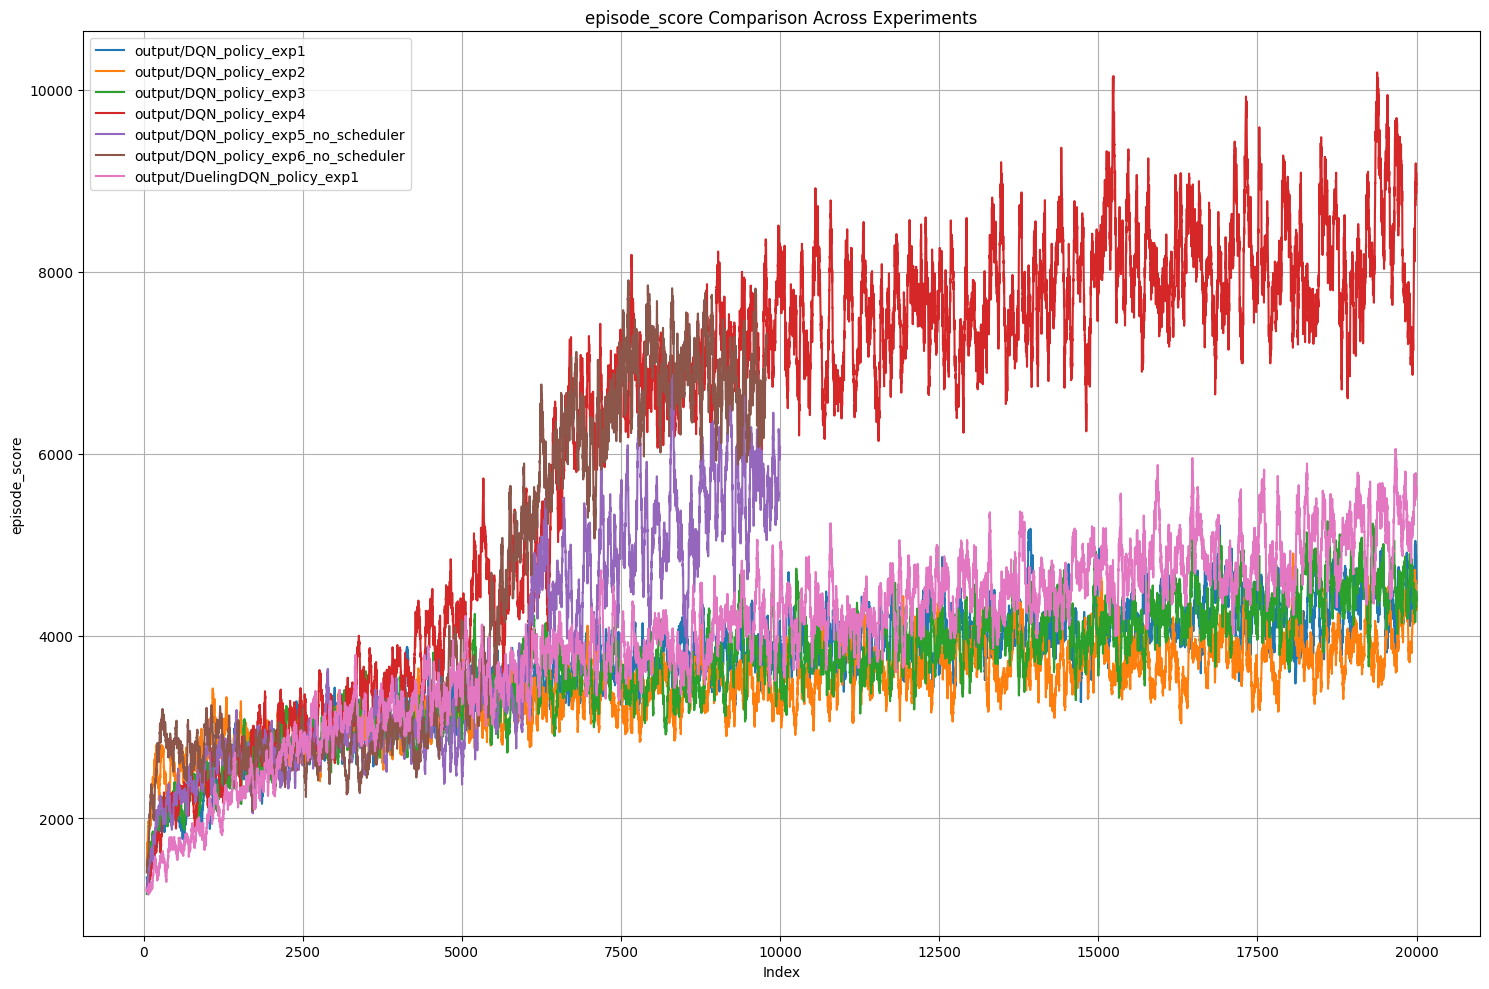

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import os

files = [
    r'output/DQN_policy_exp1/train_log.csv',
    r'output/DQN_policy_exp2/train_log.csv',
    r'output/DQN_policy_exp3/train_log.csv',
    r'output/DQN_policy_exp4/train_log.csv',
    r'output/DQN_policy_exp5_no_scheduler/train_log.csv',
    r'output/DQN_policy_exp6_no_scheduler/train_log.csv',
    r'output/DuelingDQN_policy_exp1/train_log.csv',

]

# Read CSV files
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
df3 = pd.read_csv(files[2])
df4 = pd.read_csv(files[3])
df5 = pd.read_csv(files[4])
df6 = pd.read_csv(files[5])
df7 = pd.read_csv(files[6])

window = 50
plt.figure(figsize=(15,10))
# Plot all loss curves on the same figure
plt.plot(df1['episode_score'].rolling(window=window).mean(), label=os.path.split(files[0])[0])
plt.plot(df2['episode_score'].rolling(window=window).mean(), label=os.path.split(files[1])[0])
plt.plot(df3['episode_score'].rolling(window=window).mean(), label=os.path.split(files[2])[0])
plt.plot(df4['episode_score'].rolling(window=window).mean(), label=os.path.split(files[3])[0])
plt.plot(df5['episode_score'].rolling(window=window).mean(), label=os.path.split(files[4])[0])
plt.plot(df6['episode_score'].rolling(window=window).mean(), label=os.path.split(files[5])[0])
plt.plot(df7['episode_score'].rolling(window=window).mean(), label=os.path.split(files[6])[0])


plt.xlabel('Index')
plt.ylabel('episode_score')
plt.title('episode_score Comparison Across Experiments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



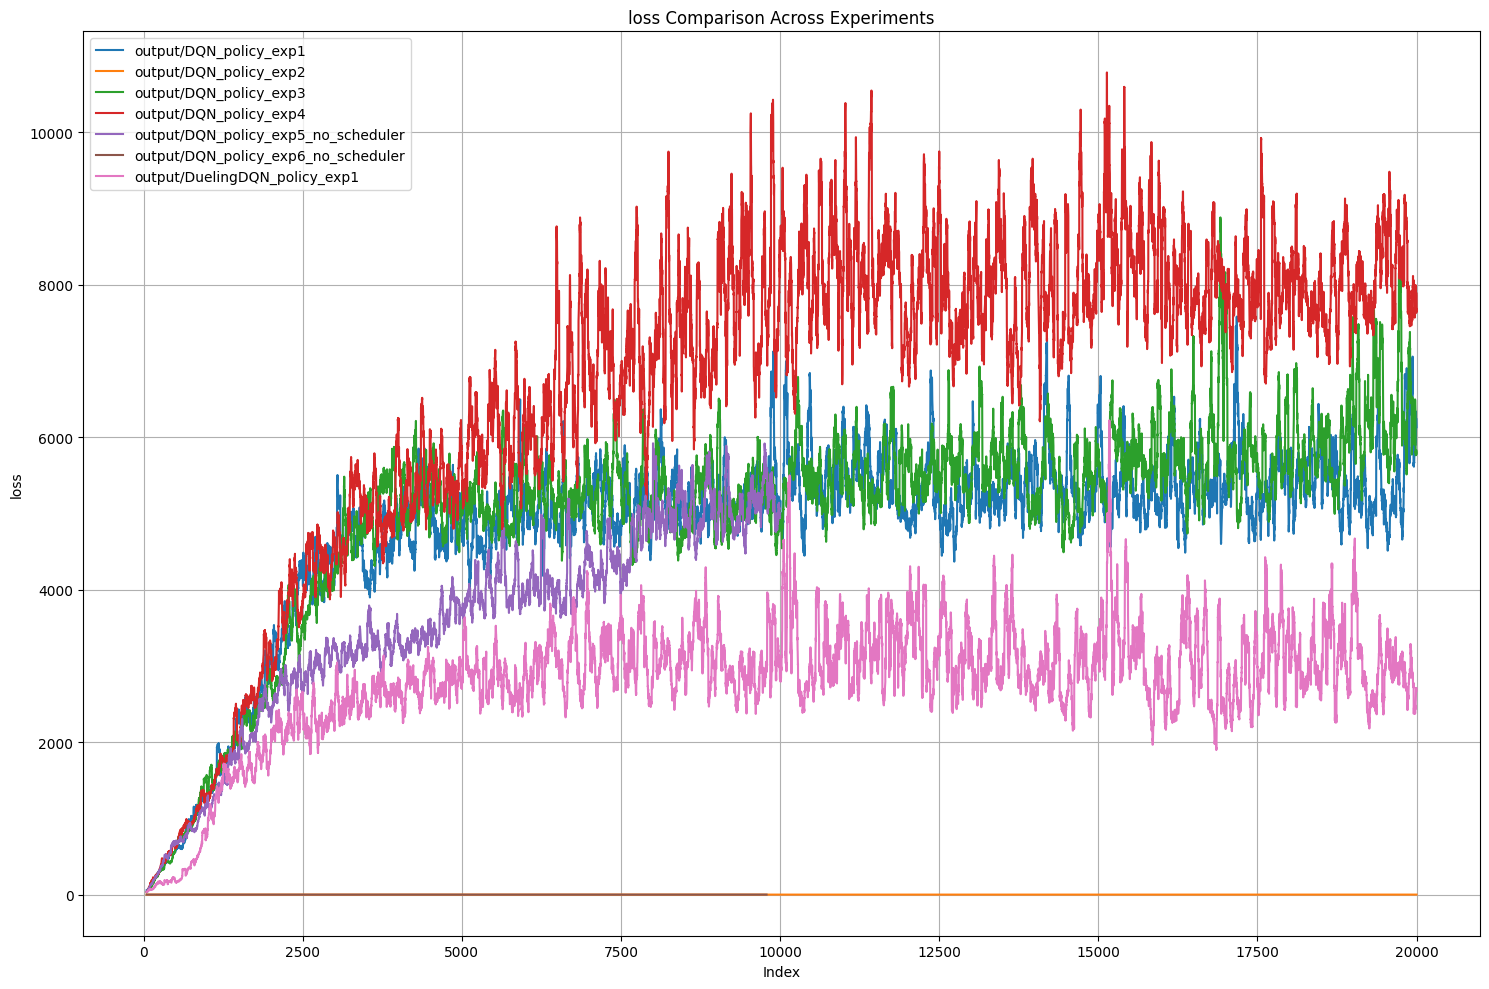

In [58]:
window = 50
plt.figure(figsize=(15,10))
# Plot all loss curves on the same figure
plt.plot(df1['loss'].rolling(window=window).mean(), label=os.path.split(files[0])[0])
plt.plot(df2['loss'].rolling(window=window).mean(), label=os.path.split(files[1])[0])
plt.plot(df3['loss'].rolling(window=window).mean(), label=os.path.split(files[2])[0])
plt.plot(df4['loss'].rolling(window=window).mean(), label=os.path.split(files[3])[0])
plt.plot(df5['loss'].rolling(window=window).mean(), label=os.path.split(files[4])[0])
plt.plot(df6['loss'].rolling(window=window).mean(), label=os.path.split(files[5])[0])
plt.plot(df7['loss'].rolling(window=window).mean(), label=os.path.split(files[6])[0])


plt.xlabel('Index')
plt.ylabel('loss')
plt.title('loss Comparison Across Experiments')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


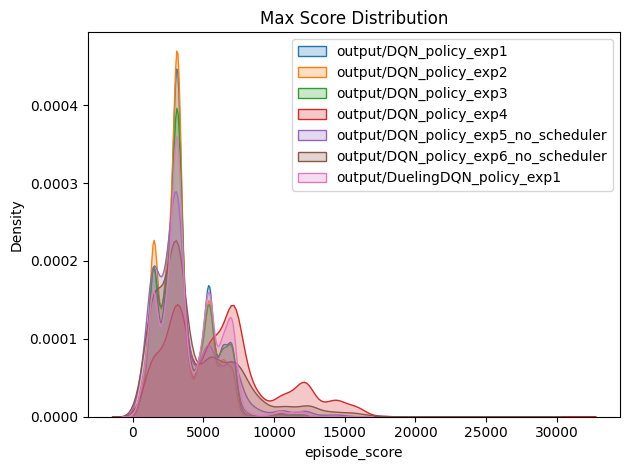

In [60]:
# Plot histogram
import seaborn as sns

sns.kdeplot(df1['episode_score'], label=os.path.split(files[0])[0], fill=True)
sns.kdeplot(df2['episode_score'], label=os.path.split(files[1])[0], fill=True)
sns.kdeplot(df3['episode_score'], label=os.path.split(files[2])[0], fill=True)
sns.kdeplot(df4['episode_score'], label=os.path.split(files[3])[0], fill=True)
sns.kdeplot(df5['episode_score'], label=os.path.split(files[4])[0], fill=True)
sns.kdeplot(df6['episode_score'], label=os.path.split(files[5])[0], fill=True)
sns.kdeplot(df7['episode_score'], label=os.path.split(files[6])[0], fill=True)

plt.xlabel('episode_score')
plt.ylabel('Density')
plt.title('Max Score Distribution')
plt.legend()
plt.tight_layout()
plt.show()

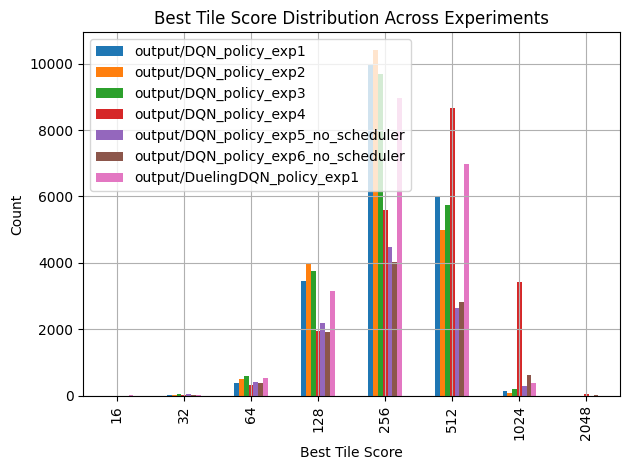

In [61]:
# Read CSVs

# Get value counts
counts1 = df1['best_tile_score'].value_counts().sort_index()
counts2 = df2['best_tile_score'].value_counts().sort_index()
counts3 = df3['best_tile_score'].value_counts().sort_index()
counts4 = df4['best_tile_score'].value_counts().sort_index()
counts5 = df5['best_tile_score'].value_counts().sort_index()
counts6 = df6['best_tile_score'].value_counts().sort_index()
counts7 = df7['best_tile_score'].value_counts().sort_index()

# Combine into a DataFrame
all_scores = sorted(set(counts1.index).union(counts2.index).union(counts3.index).union(counts4.index).union(counts5.index).union(counts6.index).union(counts7.index))
combined = pd.DataFrame({
    os.path.split(files[0])[0] : counts1.reindex(all_scores, fill_value=0),
    os.path.split(files[1])[0]: counts2.reindex(all_scores, fill_value=0),
    os.path.split(files[2])[0] : counts3.reindex(all_scores, fill_value=0),
    os.path.split(files[3])[0]: counts4.reindex(all_scores, fill_value=0),
    os.path.split(files[4])[0]: counts5.reindex(all_scores, fill_value=0),
    os.path.split(files[5])[0]: counts6.reindex(all_scores, fill_value=0),
    os.path.split(files[6])[0]: counts7.reindex(all_scores, fill_value=0),

    # 'New Reward cal + model + lr 0.0005': counts4.reindex(all_scores, fill_value=0),
    # 'New Reward cal + model + lr 0.0001': counts3.reindex(all_scores, fill_value=0),
    # 'New Reward cal + model + lr 0.00005': counts5.reindex(all_scores, fill_value=0),
})

# Plot grouped bar chart
combined.plot(kind='bar')
plt.xlabel('Best Tile Score')
plt.ylabel('Count')
plt.title('Best Tile Score Distribution Across Experiments')
plt.grid(True)
plt.tight_layout()
plt.show()
